   Product Code                         Description  Quantity  \
0             1  WHITE HANGING HEART T-LIGHT HOLDER         6   
1             1  WHITE HANGING HEART T-LIGHT HOLDER        12   
2             1  WHITE HANGING HEART T-LIGHT HOLDER        12   
3             1  WHITE HANGING HEART T-LIGHT HOLDER        72   
4             1  WHITE HANGING HEART T-LIGHT HOLDER        12   

        InvoiceDate  day  month  year  UnitPrice          Country  \
0  20/01/2011 12:11   20      1  2011       2.95        Australia   
1  10/03/2011 14:42   10      3  2011       2.95  Channel Islands   
2  01/08/2011 14:16    1      8  2011       2.95  Channel Islands   
3  14/10/2011 12:29   14     10  2011       2.95  Channel Islands   
4  06/11/2011 10:29    6     11  2011       2.95  Channel Islands   

   Country-Number  
0               1  
1               2  
2               2  
3               2  
4               2  
Mean Squared Error: 935.5496576524336
R^2 Score: 0.9684267567881494


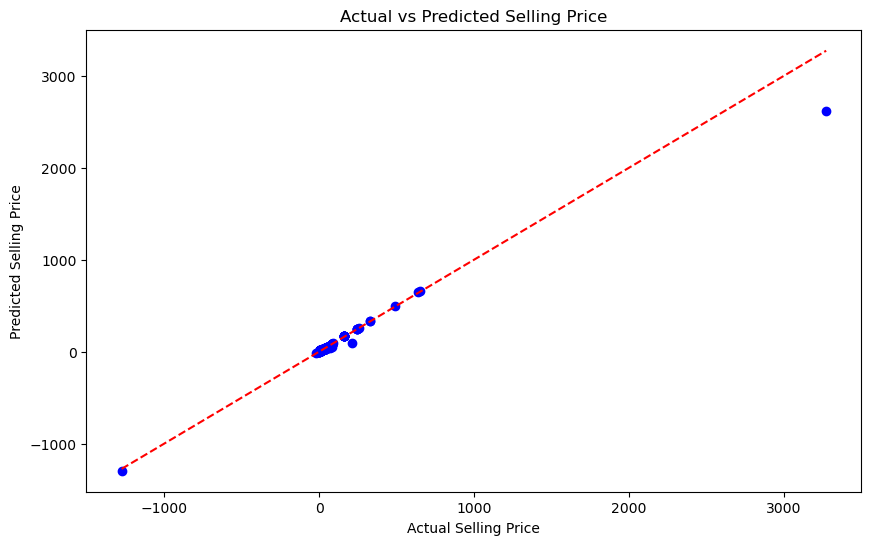

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 
#Loading the data after cleaning process and selecting White Hanging Heart product for Analysis.
file_path = r"E:/PROJECT/RUN-EU/PORTUGAL/NUMERICAL_METHOD/DATA/Team_3_Data.csv"
df = pd.read_csv(file_path)
 
# Viewing the first few rows of the DataFrame
print(df.head())
 
# Prepare the feature (independent variable) and target (dependent variable) sets
X = df[["Quantity", "day", "month", "year", "UnitPrice","Country"]]  # Feature set
y = df["UnitPrice"] * df["Quantity"]  # This is unit Price
 
# Encode categorical variables 'Country' (if needed)
X = pd.get_dummies(X, columns=["Country"], drop_first=True)
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Instantiate the Multiple Linear Regression model
model = LinearRegression()
 
# Fit the model to the training data
model.fit(X_train, y_train)
 
# Make predictions using the testing set
y_pred = model.predict(X_test)
 
# Print out the model performance metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
 
# Graphical representation of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line for prediction
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

In [3]:
# Price prediction
future_data = pd.DataFrame({
    "Quantity": [1],
    "day": [10],
    "month": [10],
    "year": [2025],
    "UnitPrice": [1],
    "Country": ["United Kingdom"]
})
future_data = pd.get_dummies(future_data, columns=["Country"], drop_first=True)
 
# Ensure future_data has the same columns as the training data
missing_cols = set(X_train.columns) - set(future_data.columns)
for col in missing_cols:
    future_data[col] = 0
future_data = future_data[X_train.columns]
 
future_price = model.predict(future_data)
print("Predicted Future Price:", future_price)

Predicted Future Price: [1.93885082]
